In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

matrix = qml.matrix(U, wire_order=range(4))()

n_target_wires = 4
target_wires = range(n_target_wires)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)


dev = qml.device("default.qubit", shots=1, wires=n_target_wires+n_estimation_wires)

@qml.qnode(dev)
def circuit(matrix):
    qml.PauliX(target_wires[-1])
    qml.QuantumPhaseEstimation(matrix, target_wires=target_wires, estimation_wires=estimation_wires)
    
    return qml.sample(wires=estimation_wires)

def get_phase(matrix):
    binary = "".join([str(b) for b in circuit(matrix)])
    return int(binary, 2) / 2 ** n_estimation_wires

for i in range(5):
    print(circuit(matrix), f"shot {i+1}, phase:",get_phase(matrix))


[0 1 0] shot 1, phase: 0.25
[0 1 0] shot 2, phase: 0.75
[0 0 0] shot 3, phase: 0.75
[1 0 0] shot 4, phase: 0.5
[1 1 0] shot 5, phase: 0.0


shape =  3
1 [3]
2 [6]
3 [2]
4 [5]
5 [1]
6 [4]
7 [7]


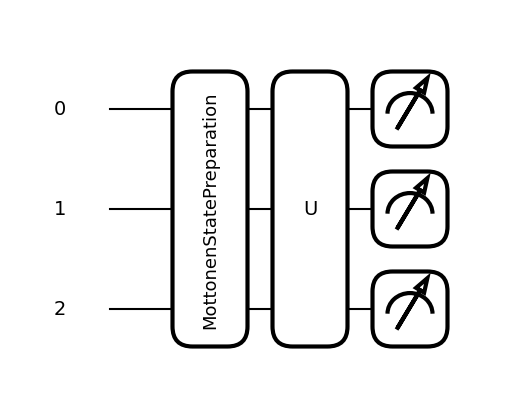

In [151]:
def get_matrix_a_mod_N(x,N):
    k=1

    while(N>2**k):
        k=k+1
        
    u = np.zeros([2**k, 2**k], dtype = int) 

    for i in range(N):
        u[(x*i)%N][i]=1
    for i in range(N,2**k):
        u[i][i]=1

    return u

matrix = get_matrix_a_mod_N(3,7)
N = int(np.log2(matrix.shape[0]))
print('shape = ', N)
dev = qml.device("default.qubit", shots=1, wires=matrix.shape[0])

qml.qnode(dev)
def circuit(matrix, state):
    qml.MottonenStatePreparation(state, wires=range(N))
    qml.QubitUnitary(matrix, wires=range(N))
    return qml.probs(wires=range(N))

qml.draw_mpl(circuit)(matrix,[int(j) for j in np.binary_repr(1, 2**N)])

for i in range(1,2**N):
    state = [int(j) for j in np.binary_repr(0,2**N)]
    state[i] = 1
    probs = qml.QNode(circuit, dev)(matrix, state)
    print(i, np.where(probs==1)[0])

(8, 8) [3. 3.]
64 0.828125 64
128 0.8359375 128
128 0.6640625 128
128 0.3359375 128
128 0.5 2
128 0.6484375 128
128 0.6796875 128
128 0.8359375 128
128 0.3359375 128
128 0.5 2
Period of the matrix =  128 2


(<Figure size 500x1100 with 1 Axes>, <Axes: >)

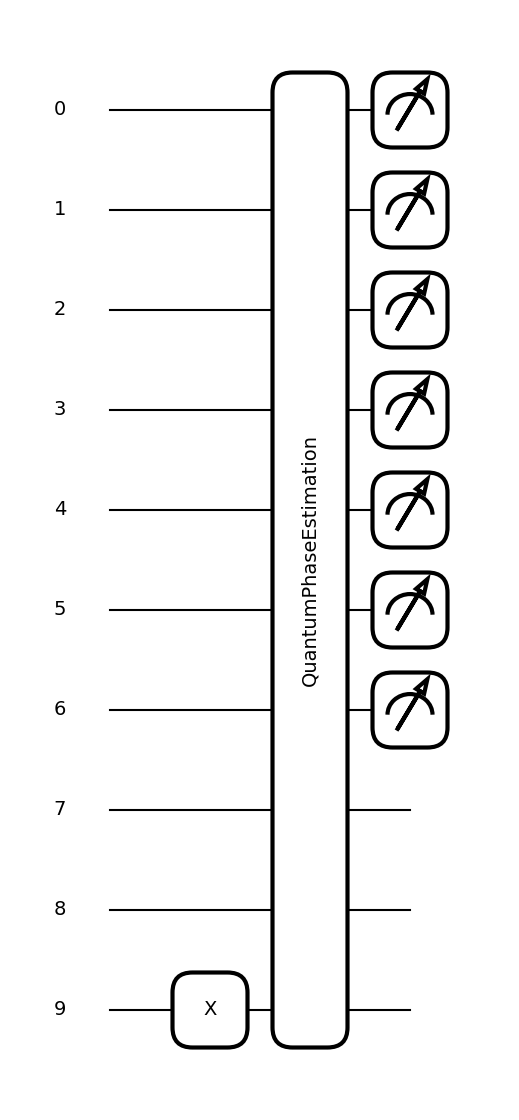

In [150]:
from fractions import Fraction
a = 3
b = 7

def get_matrix_a_mod_N(x,N):
    k=1
    while(N>2**k):
        k=k+1 
    u = np.zeros([2**k, 2**k], dtype = int) 

    for i in range(N+1):
        u[(x*i)%N][i]=1

    for i in range(N+1,2**k):
        u[i][i]=1

    return u

matrix =  get_matrix_a_mod_N(a, b)
print (matrix.shape,  np.log2(matrix.shape))
n_target_wires = int(np.log2(matrix.shape[0]))
n_estimation_wires = 2*n_target_wires+1
estimation_wires = range(0, n_estimation_wires)
target_wires = range(n_estimation_wires, n_estimation_wires + n_target_wires)

dev = qml.device("default.qubit", shots=1, wires=n_target_wires+n_estimation_wires)

@qml.qnode(dev)
def circuit(matrix):
    qml.PauliX(target_wires[-1])
    qml.QuantumPhaseEstimation(matrix, target_wires=target_wires, estimation_wires=estimation_wires)
    return qml.sample(wires=estimation_wires)

def get_phase(matrix):
    binary = "".join([str(b) for b in circuit(matrix)])
    return int(binary, 2) / 2 ** n_estimation_wires

def get_period(matrix):
    shots = 10
    r = float('-inf')
    
    for i in range(shots):
        ph = get_phase(matrix)
        r = max(r, Fraction(ph).denominator)
        print (r, ph, Fraction(ph).denominator)
    return r

period = (get_period(matrix))
print ('Period of the matrix = ', period, a**period%b)

qml.draw_mpl(circuit)(matrix)

In [57]:
def is_coprime(a, N):  
    return np.gcd(a,N) == 1

def is_odd(r):
    return r%2 != 0
    
def is_not_one(x, N):
    return x % N != 1 and x*x % N != 1

def shor(N):
    while True:
        value = np.random.randint(2,N-2)            
        U = get_matrix_a_mod_N(value, 21)
        print (U.shape)
        period = get_period(U)
        
        if is_odd(period):
            continue
        
        x = value**(period/2)%N
        
        if is_not_one(x, N):
            p = np.gcd(x-1, N)
            q = np.gcd(x+1, N)
            return [p,q]

print(shor(21))


(32, 32)


ValueError: Input unitary must be of shape (8, 8) or (batch_size, 8, 8) to act on 3 wires.

In [152]:
!pip install QuantumOperations

ERROR: Could not find a version that satisfies the requirement QuantumOperations (from versions: none)
ERROR: No matching distribution found for QuantumOperations

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
